In [237]:
pip install dataframe_image

Note: you may need to restart the kernel to use updated packages.


In [238]:
# import required libraries
import sqlite3
import pandas as pd
import dataframe_image as dfi
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

In [239]:
# Connect to the SQLite database file
conn = sqlite3.connect('olist.db')

# Get the cursor
cursor = conn.cursor()

# Retrieve the table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])

olist_order_customer_dataset
olist_order_dataset
olist_order_reviews_dataset
olist_order_payments_dataset
olist_order_items_dataset
olist_products_dataset
olist_sellers_dataset
olist_geolocation_dataset
product_category_name_translation


In [240]:
# turn database table into dataframe
df_customers = pd.read_sql_query("SELECT * FROM olist_order_customer_dataset", conn)
df_status = pd.read_sql_query("SELECT * FROM olist_order_dataset", conn)
df_payments = pd.read_sql_query("SELECT * FROM olist_order_payments_dataset", conn)
df_orders = pd.read_sql_query("SELECT * FROM olist_order_items_dataset", conn)
df_products = pd.read_sql_query("SELECT * FROM olist_products_dataset", conn)
df_products1 = pd.read_sql_query("SELECT * FROM product_category_name_translation", conn)

In [241]:
# Join data
df = pd.merge(df_customers, df_status, how= 'left', on = 'customer_id')
df = pd.merge(df, df_payments, how='left', on = 'order_id')
df = pd.merge(df, df_orders, how= 'left', on = 'order_id')
df_prod = pd.merge(df_products, df_products1, how= 'inner', on = 'product_category_name')
df = pd.merge(df, df_prod, how= 'left', on = 'product_id')
df.head()

C:\Users\Deby\AppData\Local\Temp\ipykernel_2836\1131292196.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, df_orders, how= 'left', on = 'order_id')


,index_x_x,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,index_y_x,order_id,order_status,order_purchase_timestamp,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index_y_y,product_category_name_english
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,88492,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,30.0,office_furniture
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,90418,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,...,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,7.0,housewares
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,22557,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,...,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,30.0,office_furniture
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,32180,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,...,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,30.0,office_furniture
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,69902,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,...,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,35.0,home_confort


In [242]:
# drop kolom yang tidak digunakan
df = df.drop(['index_x_x', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'index_y_x', 'order_id', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'index_x_x', 'payment_sequential', 'payment_installments', 'payment_value', 'index_y_x', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'index_x_y', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_category_name', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'index_y_y'], axis = 1)
df = df.rename(columns={'product_category_name_english': 'product'})
df.head()

,customer_city,customer_state,order_status,order_purchase_timestamp,payment_type,product
0,franca,SP,delivered,2017-05-16 15:05:35,credit_card,office_furniture
1,sao bernardo do campo,SP,delivered,2018-01-12 20:48:24,credit_card,housewares
2,sao paulo,SP,delivered,2018-05-19 16:07:45,credit_card,office_furniture
3,mogi das cruzes,SP,delivered,2018-03-13 16:06:38,credit_card,office_furniture
4,campinas,SP,delivered,2018-07-29 09:51:30,credit_card,home_confort


In [243]:
# Print the table names
for column in df:
    print(column[0:])

customer_city
customer_state
order_status
order_purchase_timestamp
payment_type
product


# CLEANING NULL

In [244]:
# Menampilkan informasi jumlah dan tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118434 entries, 0 to 118433
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   customer_city             118434 non-null  object
 1   customer_state            118434 non-null  object
 2   order_status              118434 non-null  object
 3   order_purchase_timestamp  118434 non-null  object
 4   payment_type              118431 non-null  object
 5   product                   115881 non-null  object
dtypes: object(6)
memory usage: 6.3+ MB


In [245]:
# Menampilkan deskripsi statistik dari data
df.describe(include="all").T

,count,unique,top,freq
customer_city,118434,4119,sao paulo,18738
customer_state,118434,27,SP,49967
order_status,118434,8,delivered,115038
order_purchase_timestamp,118434,98875,2017-08-08 20:26:31,63
payment_type,118431,5,credit_card,87286
product,115881,71,bed_bath_table,11823


In [246]:
# Menghitung jumlah missing value pada tiap kolom
df.isna().sum()

customer_city                  0
customer_state                 0
order_status                   0
order_purchase_timestamp       0
payment_type                   3
product                     2553
dtype: int64

In [247]:
# Columns contain nan
columns_with_nan = ["payment_type", 
                    "product"]

# tipe data tiap kolom
df[columns_with_nan].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118434 entries, 0 to 118433
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   payment_type  118431 non-null  object
 1   product       115881 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


# HANDLING MISSING VALUE & DUPLICATE

In [248]:
# impute payment_type dengan modus
df["payment_type"] = df["payment_type"].fillna(df["payment_type"].mode()[0])

# impute product dengan modus
df["product"] = df["product"].fillna(df["product"].mode()[0])

In [249]:
# Menghitung jumlah missing value pada tiap kolom setelah imputation
df.isna().sum()

customer_city               0
customer_state              0
order_status                0
order_purchase_timestamp    0
payment_type                0
product                     0
dtype: int64

In [250]:
# menghapus data duplikat dari kolom
df.drop_duplicates(keep='first',inplace=True, ignore_index=True)

In [251]:
df.head()

,customer_city,customer_state,order_status,order_purchase_timestamp,payment_type,product
0,franca,SP,delivered,2017-05-16 15:05:35,credit_card,office_furniture
1,sao bernardo do campo,SP,delivered,2018-01-12 20:48:24,credit_card,housewares
2,sao paulo,SP,delivered,2018-05-19 16:07:45,credit_card,office_furniture
3,mogi das cruzes,SP,delivered,2018-03-13 16:06:38,credit_card,office_furniture
4,campinas,SP,delivered,2018-07-29 09:51:30,credit_card,home_confort


# DATA MANIPULATION

In [252]:
# mengkategorikan waktu dalam 1 hari
def time_of_day(hour):
    return (
        "Pagi" if 5 <= hour <= 11
        else
        "Siang" if 12 <= hour <= 17
        else
        "Sore" if 18 <= hour <= 22
        else
        "Malam"
    )

In [253]:
# mengkategorikan minggu dalam 1 bulan
def week_of_month(day):
    return (
        "Week 1" if 1 <= day <= 7
        else
        "Week 2" if 8 <= day <= 14
        else
        "Week 3" if 15 <= day <= 21
        else
        "Week 4"
    )

In [254]:
# convert order_purchase_timestamp menjadi datetime
purchase_time = pd.to_datetime(df['order_purchase_timestamp'])
df['purchase_date'] = purchase_time.dt.to_period('M').astype('str') # kolom tanggal lengkap 
df['purchase_year'] = purchase_time.dt.year # kolom tahun
df['purchase_month'] = purchase_time.dt.month_name() # kolom bulan
df['purchase_month_number'] = purchase_time.dt.month # kolom bulan dalam angka
df['purchase_day'] = purchase_time.dt.day_name() # kolom hari
df['purchase_day_number'] = purchase_time.dt.day # kolom tanggal
df['purchase_hour'] = purchase_time.dt.hour # kolom jam
df['purchase_timeofday'] = df['purchase_hour'].apply(time_of_day) # kolom range waktu
df['purchase_weekofmonth'] = df['purchase_day_number'].apply(week_of_month) # kolom range minggu

df['purchase_date'] = df['purchase_date'].str.replace('-','')
df.head()

,customer_city,customer_state,order_status,order_purchase_timestamp,payment_type,product,purchase_date,purchase_year,purchase_month,purchase_month_number,purchase_day,purchase_day_number,purchase_hour,purchase_timeofday,purchase_weekofmonth
0,franca,SP,delivered,2017-05-16 15:05:35,credit_card,office_furniture,201705,2017,May,5,Tuesday,16,15,Siang,Week 3
1,sao bernardo do campo,SP,delivered,2018-01-12 20:48:24,credit_card,housewares,201801,2018,January,1,Friday,12,20,Sore,Week 2
2,sao paulo,SP,delivered,2018-05-19 16:07:45,credit_card,office_furniture,201805,2018,May,5,Saturday,19,16,Siang,Week 3
3,mogi das cruzes,SP,delivered,2018-03-13 16:06:38,credit_card,office_furniture,201803,2018,March,3,Tuesday,13,16,Siang,Week 2
4,campinas,SP,delivered,2018-07-29 09:51:30,credit_card,home_confort,201807,2018,July,7,Sunday,29,9,Pagi,Week 4


# ANALISA

## 1. Top 5 city dan state dengan Jumlah Customer Terbanyak

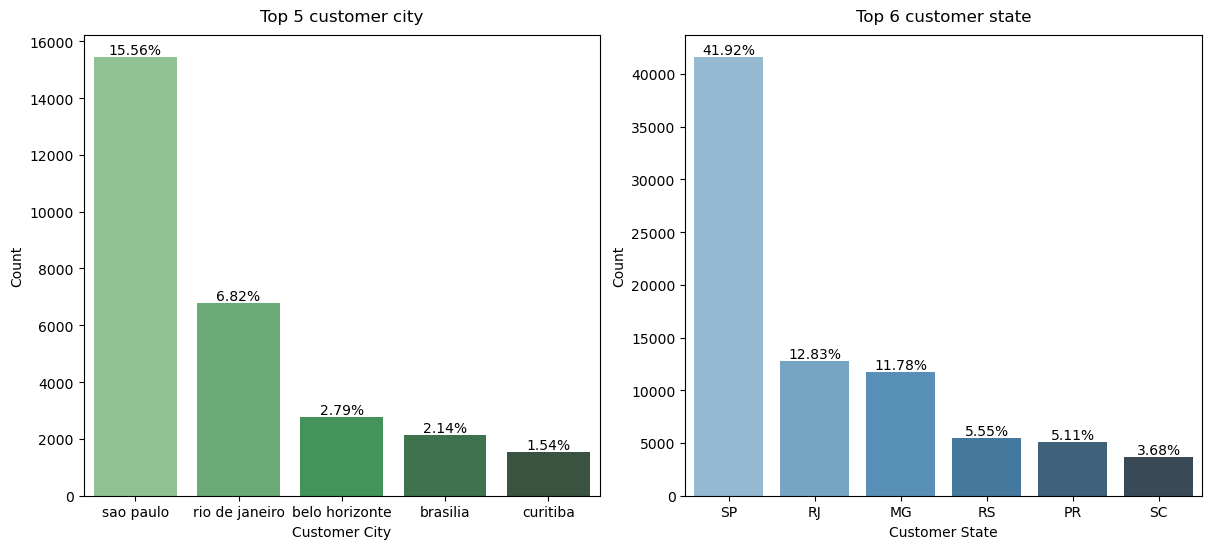

In [255]:
# Menentukan kondisi customer dengan purchase sudah terkirim
cond = df[(df['order_status'] == 'delivered')]

# Create subplots
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Top 5 customer city
sns.countplot(x=cond["customer_city"], palette="Greens_d",
              order=cond.customer_city.value_counts().iloc[:5].index, ax = ax1)
total = len(cond['customer_city'])
for p in ax1.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_y() + p.get_height() 
    ax1.annotate(percentage, (x,y),
    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax1.set_title('Top 5 customer city', size=12, pad=10)
ax1.set_xlabel('Customer City')
ax1.set_ylabel('Count')

# Top 6 customer state
sns.countplot(x=cond["customer_state"], palette="Blues_d",
              order=cond.customer_state.value_counts().iloc[:6].index, ax = ax2)
total = len(cond['customer_state'])
for p in ax2.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2
    y = p.get_y() + p.get_height() 
    ax2.annotate(percentage, (x,y),
    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax2.set_title('Top 6 customer state', size=12, pad=10)
ax2.set_xlabel('Customer State')
ax2.set_ylabel('Count')

plt.savefig('Top 5 customer city and state.png')

## 2. Perbandingan Jumlah Produk yang terjual per tahun

In [256]:
# Pengecekan di bulan apa saja penjualan terjadi di Tahun 2016, 2017 dan 2018 
df1 = df[(df['order_status'] == 'delivered') & (df['purchase_year']== 2016)]
print(f"Penjualan di Tahun 2016 terjadi selama {len(df1['purchase_month_number'].unique())} bulan, yaitu di bulan {df1['purchase_month_number'].unique()}")

df2 = df[(df['order_status'] == 'delivered') & (df['purchase_year']== 2017)]
print(f"Penjualan di Tahun 2017 terjadi selama {len(df2['purchase_month_number'].unique())} bulan, yaitu di bulan {df2['purchase_month_number'].unique()}")

df3 = df[(df['order_status'] == 'delivered') & (df['purchase_year']== 2018)]
print(f"Penjualan di Tahun 2018 terjadi selama {len(df3['purchase_month_number'].unique())} bulan, yaitu di bulan {df3['purchase_month_number'].unique()}")

Penjualan di Tahun 2016 terjadi selama 3 bulan, yaitu di bulan [10  9 12]
Penjualan di Tahun 2017 terjadi selama 12 bulan, yaitu di bulan [ 5  9 11  8 10  4  6 12  1  7  3  2]
Penjualan di Tahun 2018 terjadi selama 8 bulan, yaitu di bulan [1 5 3 7 2 4 8 6]


In [257]:
# Total produk yang terjual di bulan 9, 10 dan 12 pada tahun 2016 dan 2017
cond = df[(df['order_status'] == 'delivered') & ((df['purchase_year'] == 2016)|(df['purchase_year'] == 2017))]
cond2= cond[(cond['purchase_month_number'] == 9) | (cond['purchase_month_number'] == 10) | (cond['purchase_month_number'] == 12)]

# Perbanding Jumlah produk yang terjual di bulan 9, 10, 12 pada tahun 2016 dan 2017
total_products = len(cond2["product"])
count_a = cond2.groupby(["purchase_year"])["product"].count().sort_values(ascending=False).head(5)
count1 = (cond2.groupby(["purchase_year"])["product"].count() / total_products * 100).sort_values(ascending=False).head(5)
print(f'{count_a} \n')
print(count1)

purchase_year
2017    14589
2016      274
Name: product, dtype: int64 

purchase_year
2017    98.156496
2016     1.843504
Name: product, dtype: float64


In [258]:
# create dataframe perbandingan total penjualan di 2016 dan 2017
dfa = pd.DataFrame({'purchase_year': [2017, 2016],
                    'count': [14589, 274]})

dfb = pd.DataFrame({'purchase_year': [2017, 2016],
                    'percentage': [98.16, 1.84]})

# merge 2 dataframes berdasarkan 'purchase_year'
df_1617 = pd.merge(dfa, dfb, on='purchase_year')

print(df_1617)
df_styled = df_1617.style.background_gradient()
dfi.export(df_styled,"mytable1.png")

   purchase_year  count  percentage
0           2017  14589       98.16
1           2016    274        1.84


In [259]:
# Total produk yang terjual di bulan 1 - 8 pada tahun 2017 dan 2018
cond = df[(df['order_status'] == 'delivered') & ((df['purchase_year'] == 2017)|(df['purchase_year'] == 2018))]
cond2= cond[cond['purchase_month_number'].between(1, 8, inclusive=True)]

# Perbanding Jumlah produk yang terjual di bulan 1 - 8 pada tahun 2017 dan 2018
total_products1 = len(cond2["product"])
count_b = cond2.groupby(["purchase_year"])["product"].count().sort_values(ascending=False).head(5)
count2 = (cond2.groupby(["purchase_year"])["product"].count() / total_products1 * 100).sort_values(ascending=False).head(5)
print(f'{count_b} \n')
print(count2)

purchase_year
2018    54209
2017    22716
Name: product, dtype: int64 

purchase_year
2018    70.469938
2017    29.530062
Name: product, dtype: float64


C:\Users\Deby\AppData\Local\Temp\ipykernel_2836\2872148869.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  cond2= cond[cond['purchase_month_number'].between(1, 8, inclusive=True)]


In [260]:
# create dataframe perbandingan total penjualan di 2017 dan 2018
dfc = pd.DataFrame({'purchase_year': [2018, 2017],
                    'count': [54209, 22716]})

dfd = pd.DataFrame({'purchase_year': [2018, 2017],
                    'percentage': [70.47, 29.53]})

# merge 2 dataframes berdasarkan 'purchase_year'
df_1718 = pd.merge(dfc, dfd, on='purchase_year')

print(df_1718)
df_styled = df_1718.style.background_gradient()
dfi.export(df_styled,"mytable2.png")

   purchase_year  count  percentage
0           2018  54209       70.47
1           2017  22716       29.53


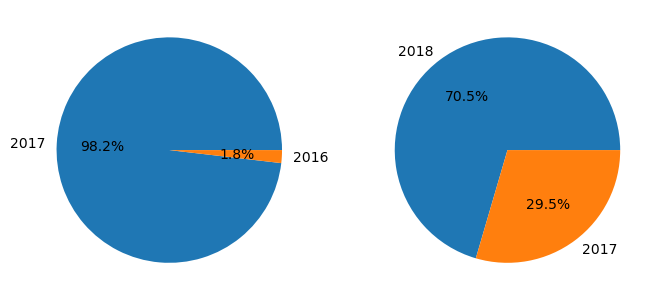

<Figure size 640x480 with 0 Axes>

In [261]:
# create the pie chart
fig, axs = plt.subplots(1, 2, figsize = (8, 8))
fig = plt.figure()
axs[0].pie(count1, labels=count1.index, autopct='%1.1f%%')
axs[1].pie(count2, labels=count2.index, autopct='%1.1f%%')
plt.show()

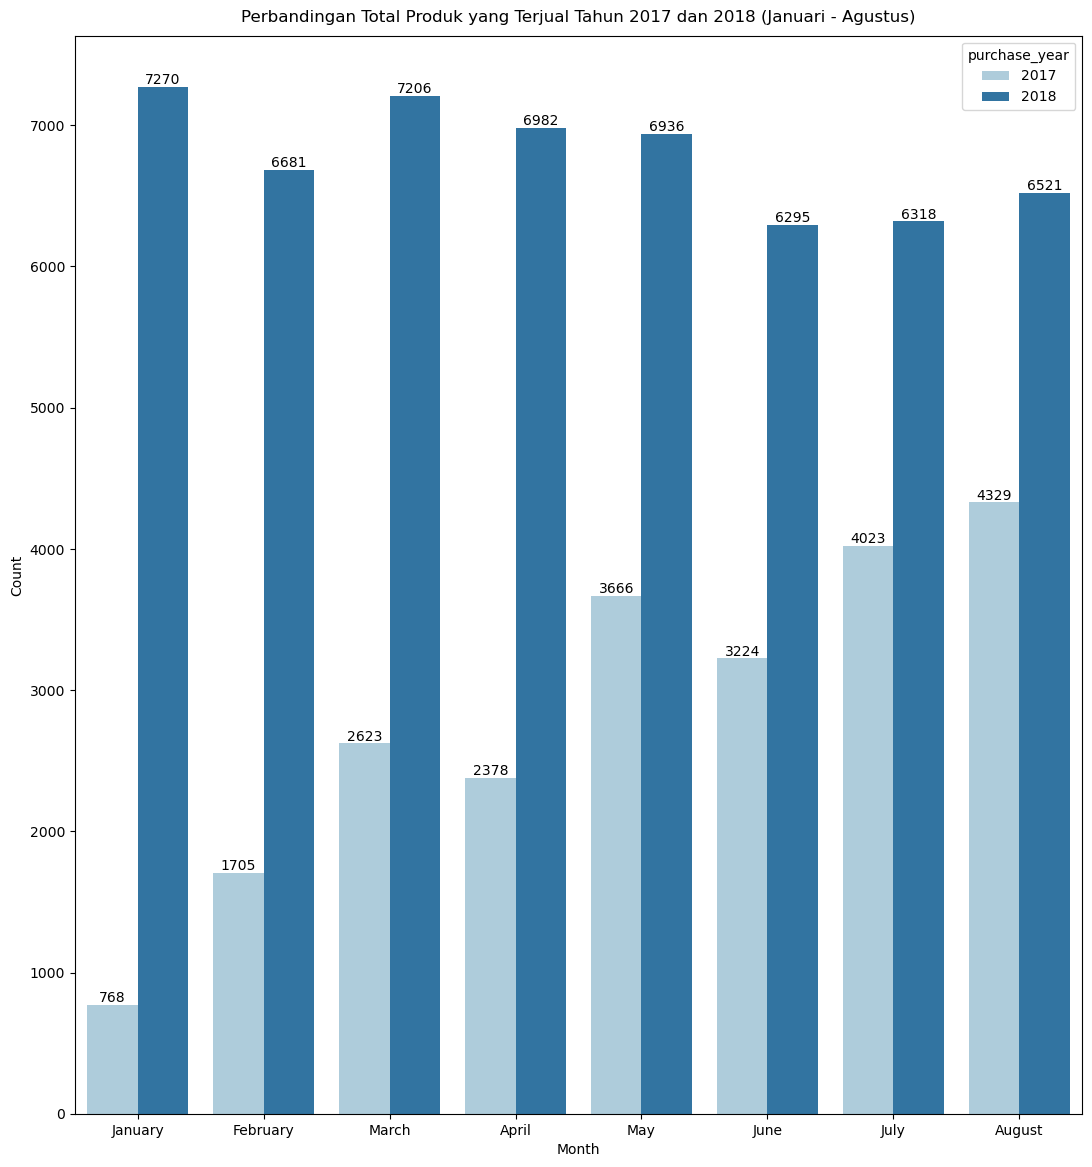

In [262]:
# Perbandingan total produk yang terjual di tahun 2017 dan 2018 selama bulan Januari - Agustus
fig = plt.figure(figsize=(13, 14))
month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
ax = sns.countplot(x=cond2['purchase_month'], palette='Paired',
                   hue=cond2['purchase_year'], order=month_label)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax.set_title('Perbandingan Total Produk yang Terjual Tahun 2017 dan 2018 (Januari - Agustus)', size=12, pad=10)
ax.set_xlabel('Month')
ax.set_ylabel('Count')
plt.savefig('Total Produk 1718.png')

## 3. Top 5 Produk dengan penjualan tertinggi dan terendah

### 3.1 Top 5 Produk dengan penjualan tertinggi dan terendah dari 2016 - 2018

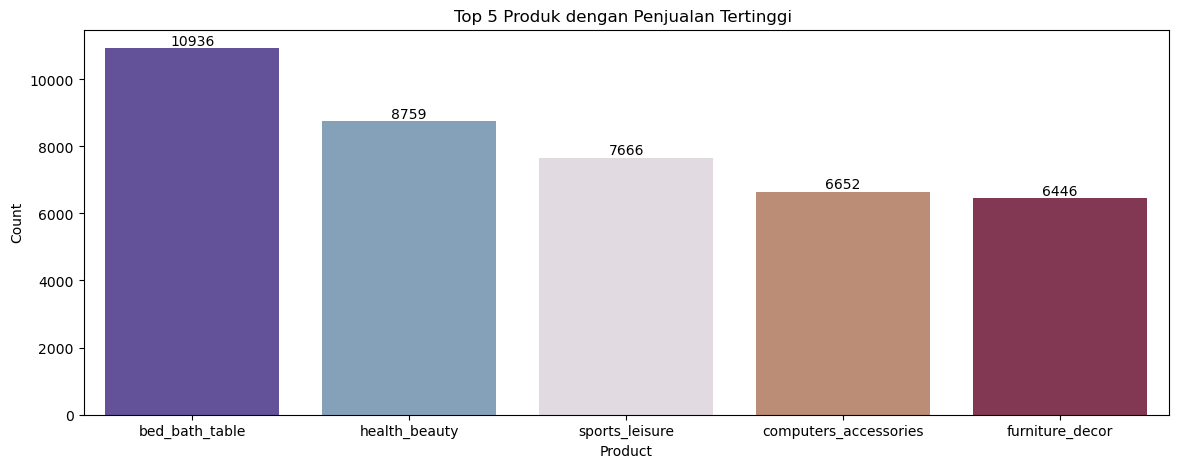

In [263]:
cond = df[(df['order_status'] == 'delivered')]
         
# Top 5 Sold Product
fig = plt.figure(figsize=(14, 5))
ax = sns.countplot(x=cond['product'], palette='twilight_shifted',
                   order = cond['product'].value_counts().iloc[:5].index)
total = len(cond['product'])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax.set_title('Top 5 Produk dengan Penjualan Tertinggi ')
ax.set_xlabel('Product')
ax.set_ylabel('Count')
plt.savefig('Top 5 produk overtime.png')

Text(0, 0.5, 'Count')

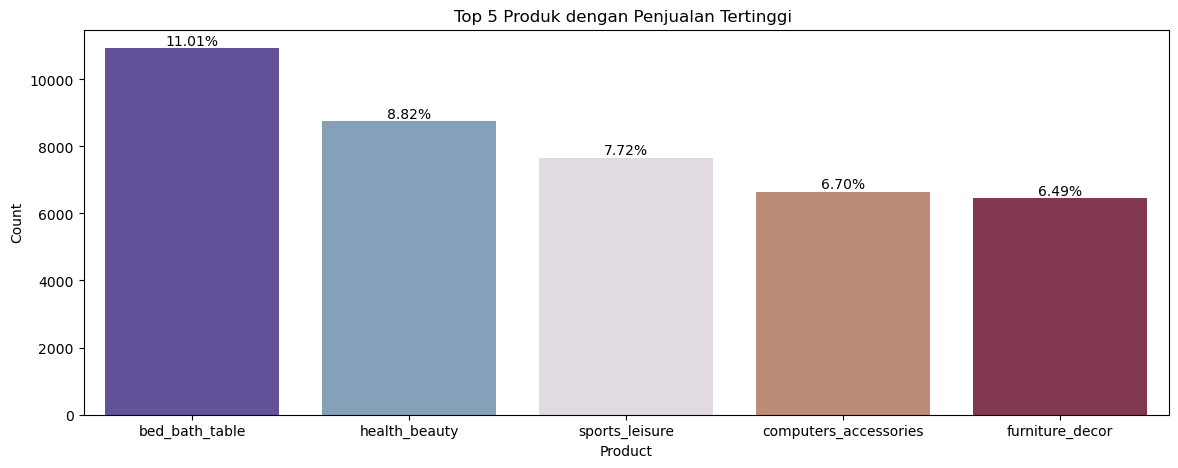

In [264]:
cond = df[(df['order_status'] == 'delivered')]
         
# Top 5 Sold Product in percentage
fig = plt.figure(figsize=(14, 5))
ax = sns.countplot(x=cond['product'], palette='twilight_shifted',
                   order = cond['product'].value_counts().iloc[:5].index)
total = len(cond['product'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax.set_title('Top 5 Produk dengan Penjualan Tertinggi ')
ax.set_xlabel('Product')
ax.set_ylabel('Count')

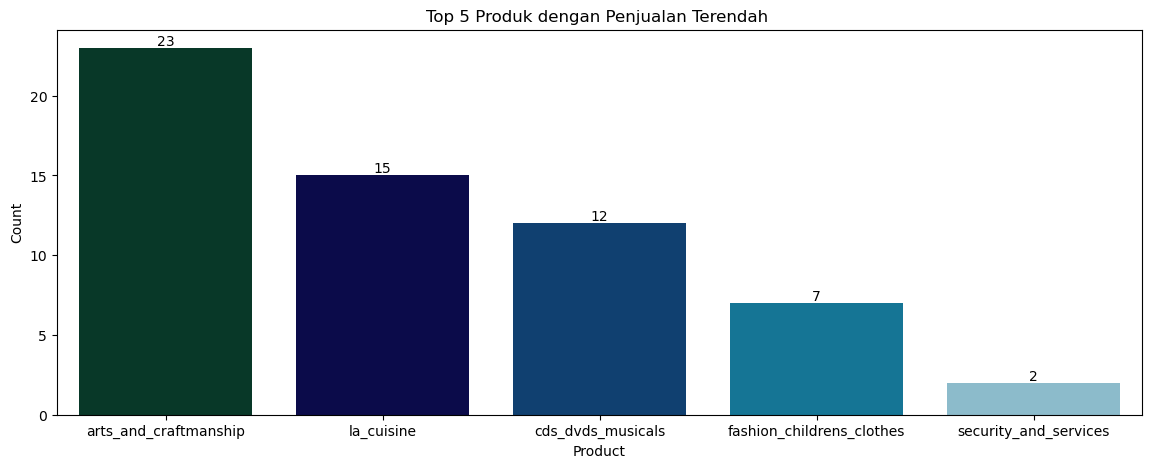

In [265]:
# Least 5 Sold Product
fig = plt.figure(figsize=(14, 5))
ax = sns.countplot(x=cond['product'], palette='ocean',
                   order = cond['product'].value_counts().tail(5).index)
total = len(cond['product'])
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax.set_title('Top 5 Produk dengan Penjualan Terendah ')
ax.set_xlabel('Product')
ax.set_ylabel('Count')
plt.savefig('Least 5 produk overtime.png')

Text(0, 0.5, 'Count')

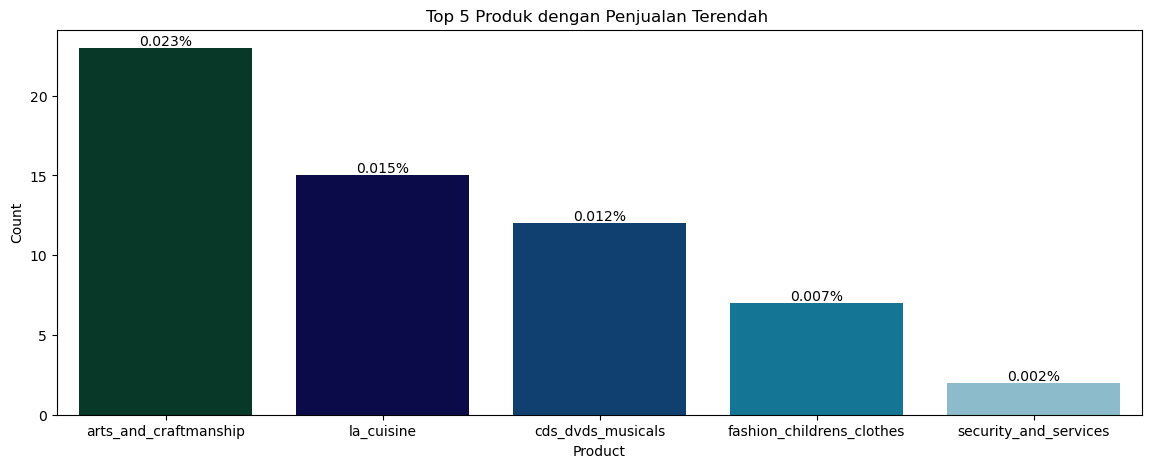

In [266]:
# Least 5 Sold Product with percentage
fig = plt.figure(figsize=(14, 5))
ax = sns.countplot(x=cond['product'], palette='ocean',
                   order = cond['product'].value_counts().tail(5).index)
total = len(cond['product'])
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax.set_title('Top 5 Produk dengan Penjualan Terendah ')
ax.set_xlabel('Product')
ax.set_ylabel('Count')

### 3.2 Top 5 Produk dengan penjualan tertinggi dan terendah per tahun

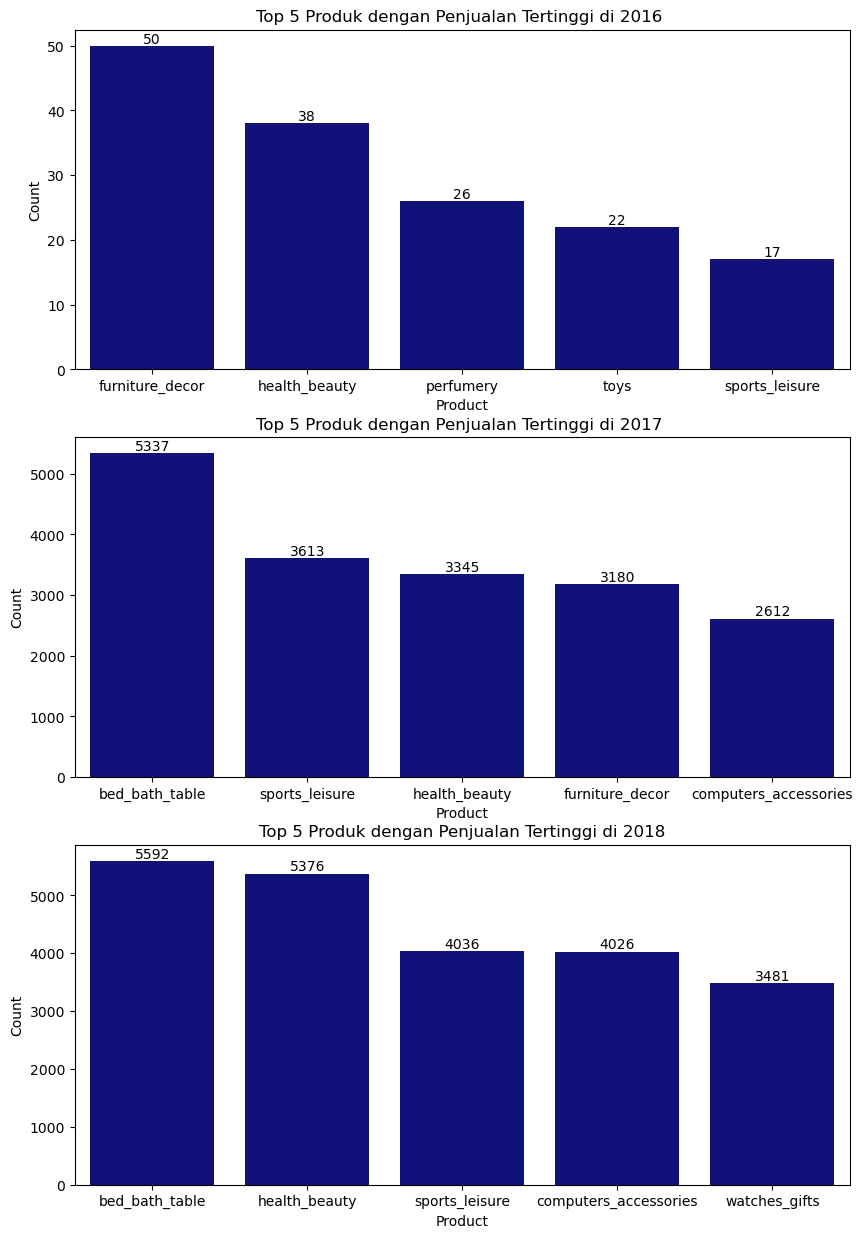

In [267]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))

# Top 5 Sold Product in 2016
df1 = df[(df['order_status'] == 'delivered') & (df['purchase_year']== 2016)]
sns.countplot(x=df1['product'], color='darkblue',
                   order = df1['product'].value_counts().iloc[:5].index, ax = ax1)
for p in ax1.patches:
    ax1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax1.set_title('Top 5 Produk dengan Penjualan Tertinggi di 2016 ')
ax1.set_xlabel('Product')
ax1.set_ylabel('Count')

# Top 5 Sold Product in 2017
df2 = df[(df['order_status'] == 'delivered') & (df['purchase_year']== 2017)]
sns.countplot(x=df2['product'], color='darkblue',
                   order = df2['product'].value_counts().iloc[:5].index, ax = ax2)
for p in ax2.patches:
    ax2.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax2.set_title('Top 5 Produk dengan Penjualan Tertinggi di 2017 ')
ax2.set_xlabel('Product')
ax2.set_ylabel('Count')

# Top 5 Sold Product in 2018
df3 = df[(df['order_status'] == 'delivered') & (df['purchase_year']== 2018)]
sns.countplot(x=df3['product'], color='darkblue',
                   order = df3['product'].value_counts().iloc[:5].index, ax = ax3)
for p in ax3.patches:
    ax3.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax3.set_title('Top 5 Produk dengan Penjualan Tertinggi di 2018')
ax3.set_xlabel('Product')
ax3.set_ylabel('Count')
plt.savefig('Top 5 produk per tahun.png')

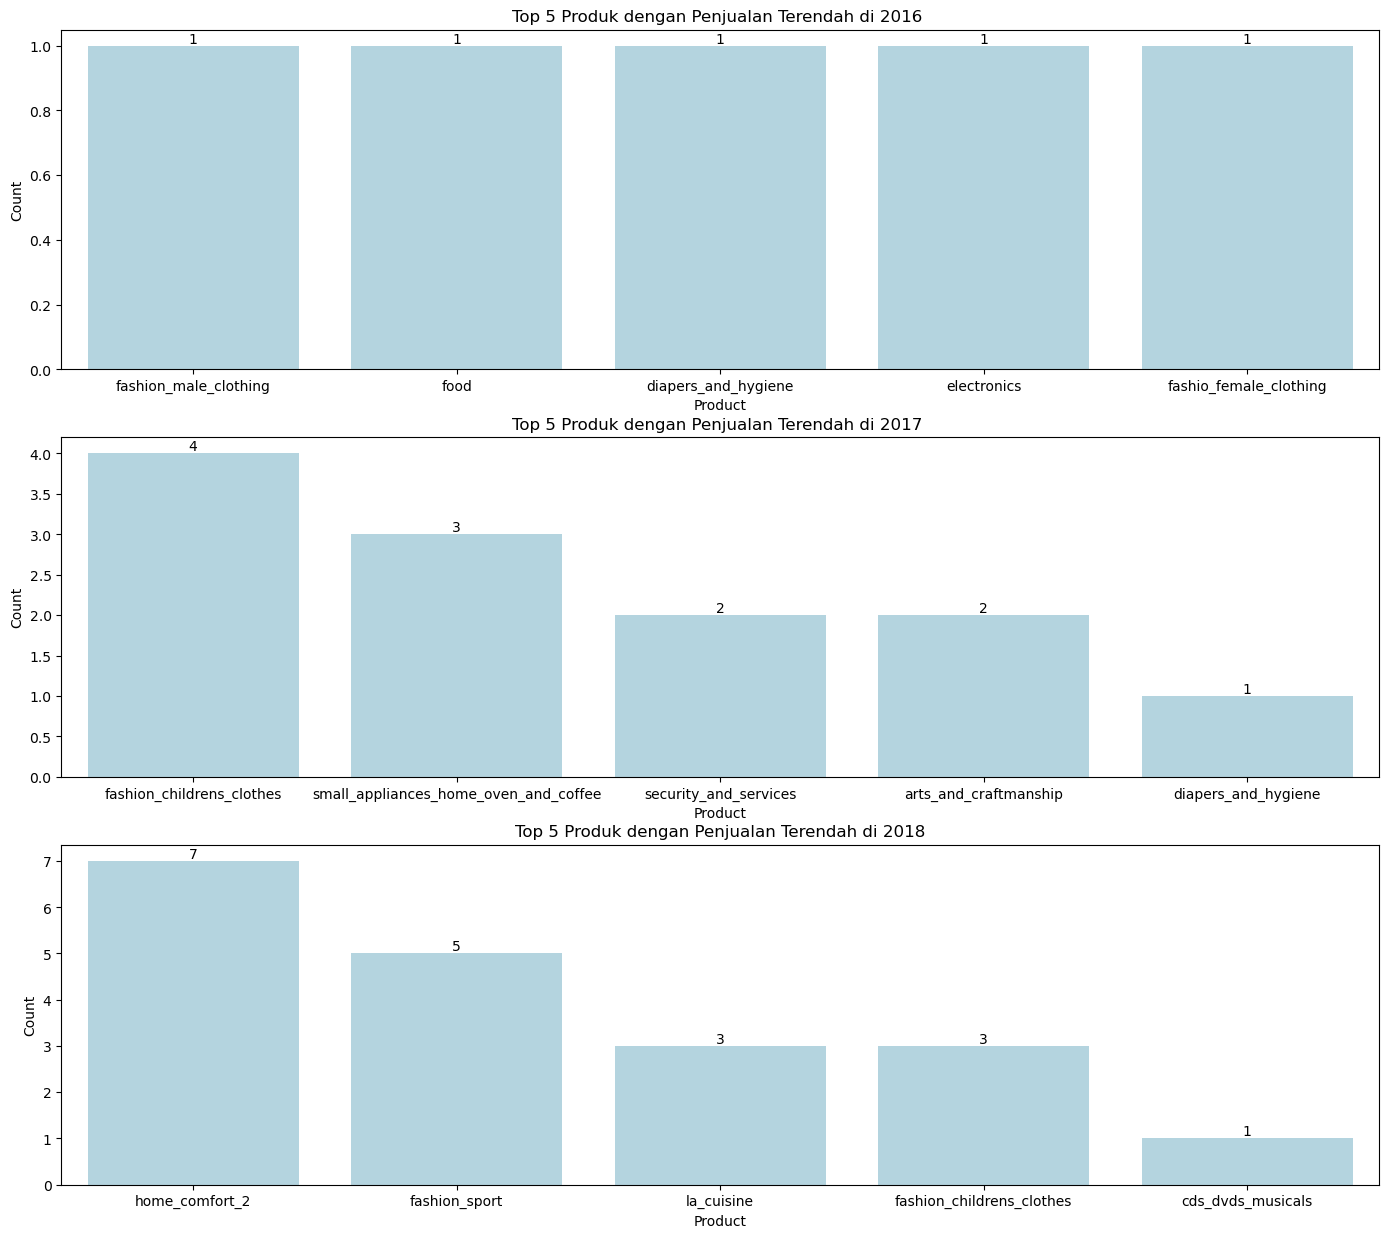

In [268]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(17, 15))

# Least 10 Sold Product in 2016
df1 = df[(df['order_status'] == 'delivered') & (df['purchase_year']== 2016)]
sns.countplot(x=df1['product'], color='lightblue',
                   order = df1['product'].value_counts().tail(5).index, ax = ax1)
for p in ax1.patches:
    ax1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax1.set_title('Top 5 Produk dengan Penjualan Terendah di 2016 ')
ax1.set_ylabel('Count')
ax1.set_xlabel('Product')

# Least 10 Sold Product in 2017
df2 = df[(df['order_status'] == 'delivered') & (df['purchase_year']== 2017)]
sns.countplot(x=df2['product'], color='lightblue',
                   order = df2['product'].value_counts().tail(5).index, ax = ax2)
for p in ax2.patches:
    ax2.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax2.set_title('Top 5 Produk dengan Penjualan Terendah di 2017 ')
ax2.set_ylabel('Count')
ax2.set_xlabel('Product')

# Least 10 Sold Product in 2018
df3 = df[(df['order_status'] == 'delivered') & (df['purchase_year']== 2018)]
sns.countplot(x=df3['product'], color='lightblue',
                   order = df3['product'].value_counts().tail(5).index, ax = ax3)
for p in ax3.patches:
    ax3.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax3.set_title('Top 5 Produk dengan Penjualan Terendah di 2018')
ax3.set_ylabel('Count')
ax3.set_xlabel('Product')
plt.savefig('Least 5 produk per tahun.png')

## 4. Payment Type yang digemari customers

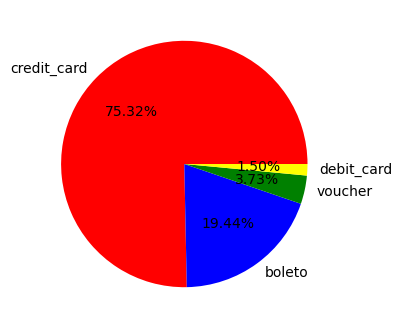

In [269]:
# Payment type in all years 
payments = df[(df['order_status'] == 'delivered')]

total_products = len(payments["product"])
count1 = (payments.groupby(["payment_type"])["product"].count() / total_products * 100).sort_values(ascending=False).head(5)

# create the pie chart
fig = plt.figure(figsize=(4, 4))

palette ={'red': 'credit_card', 'blue': 'boleto', 'green': 'voucher', 'yellow': 'debit_card'}
plt.pie(count1, labels=count1.index, autopct='%1.2f%%', colors = palette)
plt.show()

### 4.1 Payment Type Berdasarkan Top 5 Sold Product

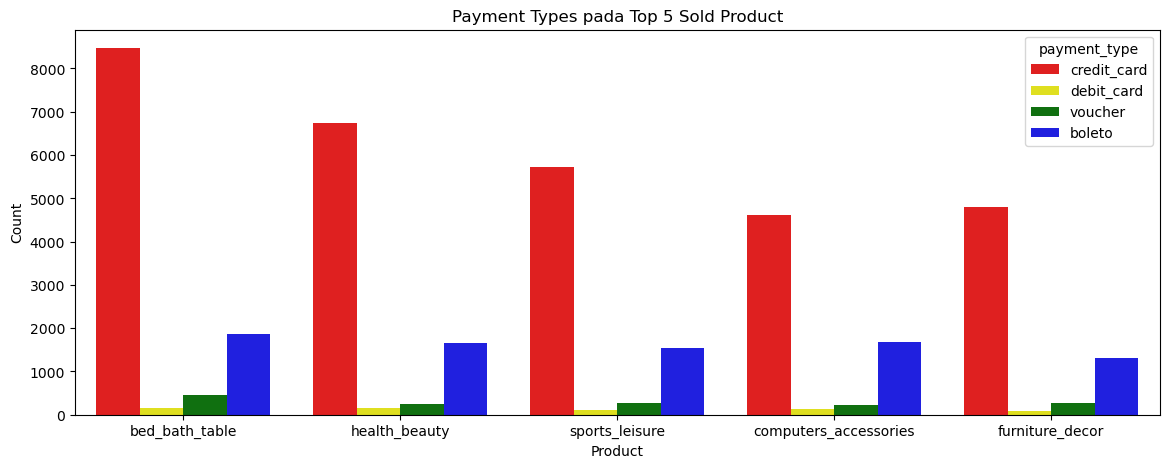

In [270]:
# Payment Type berdasarkan Top 5 Sold Product over time
fig = plt.figure(figsize=(14, 5))
cond = df[(df['order_status'] == 'delivered')]

palette ={'credit_card': 'red', 'boleto': 'blue', 'voucher': 'green', 'debit_card': 'yellow'}
ax= sns.countplot(x=cond['product'], palette= palette, hue=cond['payment_type'], 
                   order = cond['product'].value_counts().iloc[:5].index)
ax.set_title('Payment Types pada Top 5 Sold Product')
ax.set_xlabel('Product')
ax.set_ylabel('Count')
plt.savefig('Payment types top 5 product.png')

### 4.2 Payment Type Berdasarkan Least 5 Sold Product

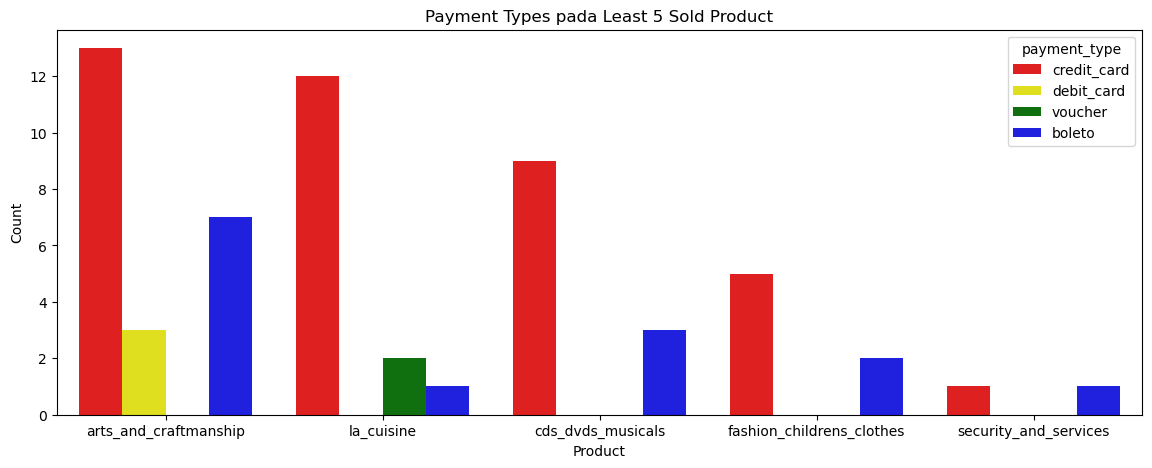

In [271]:
# Least 5 Sold Product dan payment type nya
fig = plt.figure(figsize=(14, 5))

palette ={'credit_card': 'red', 'boleto': 'blue', 'voucher': 'green', 'debit_card': 'yellow'}
ax = sns.countplot(x=cond['product'], palette= palette, hue= cond['payment_type'],
                   order = cond['product'].value_counts().tail(5).index)
ax.set_title('Payment Types pada Least 5 Sold Product')
ax.set_xlabel('Product')
ax.set_ylabel('Count')
plt.savefig('Payment types least 5 product.png')

### 4.3 Payment Type Berdasarkan Top and Least 5 Sold Product in 2018

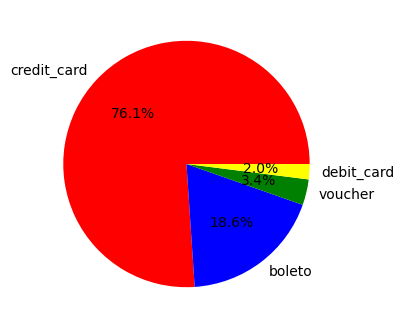

In [272]:
# Payment type in 2018 
payment_2018 = df[(df['order_status'] == 'delivered') & (df['purchase_year'] == 2018)]

total_products = len(payment_2018["product"])
count1 = (payment_2018.groupby(["payment_type"])["product"].count() / total_products * 100).sort_values(ascending=False).head(5)

# create the pie chart
fig = plt.figure(figsize=(4, 4))

palette ={'red': 'credit_card', 'blue': 'boleto', 'green': 'voucher', 'yellow': 'debit_card'}
plt.pie(count1, labels=count1.index, autopct='%1.1f%%', colors = palette)
plt.show()

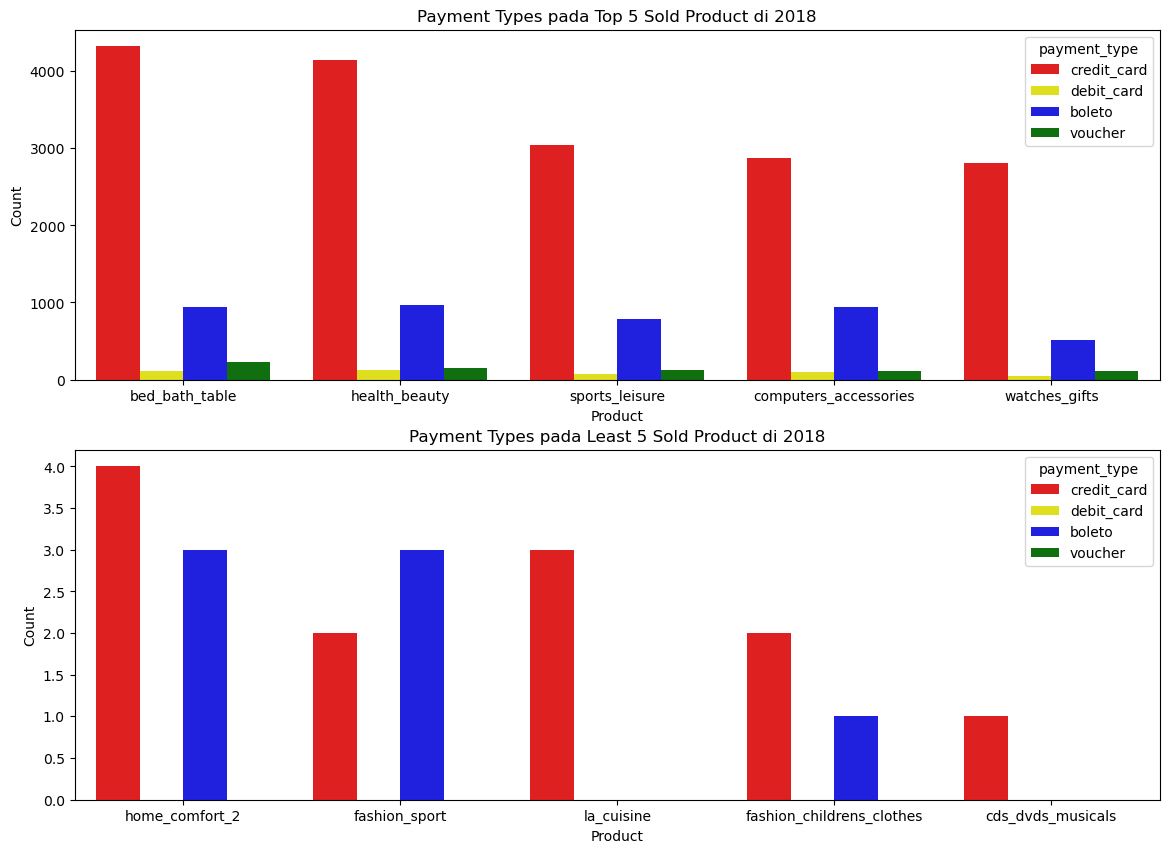

In [273]:
# Sold Product in 2018 
cond = df[(df['order_status'] == 'delivered') & (df['purchase_year'] == 2018)]

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14, 10))

# assign palette
palette ={'credit_card': 'red', 'boleto': 'blue', 'voucher': 'green', 'debit_card': 'yellow'}

# Top 5 Sold Product in 2018 beserta payment type nya
sns.countplot(x=cond['product'], palette=palette, hue= cond['payment_type'], ax= ax1,
                   order = cond['product'].value_counts().head(5).index)
ax1.set_title('Payment Types pada Top 5 Sold Product di 2018')
ax1.set_xlabel('Product')
ax1.set_ylabel('Count')

# Top 5 Least Product in 2018 beserta payment type nya
sns.countplot(x=cond['product'], palette=palette, hue= cond['payment_type'], ax= ax2,
                   order = cond['product'].value_counts().tail(5).index)
ax2.set_title('Payment Types pada Least 5 Sold Product di 2018')
ax2.set_xlabel('Product')
ax2.set_ylabel('Count')

plt.savefig('Payment types top and least 5 product 2018.png')

## 5. Peak time online transaction happen in 2018

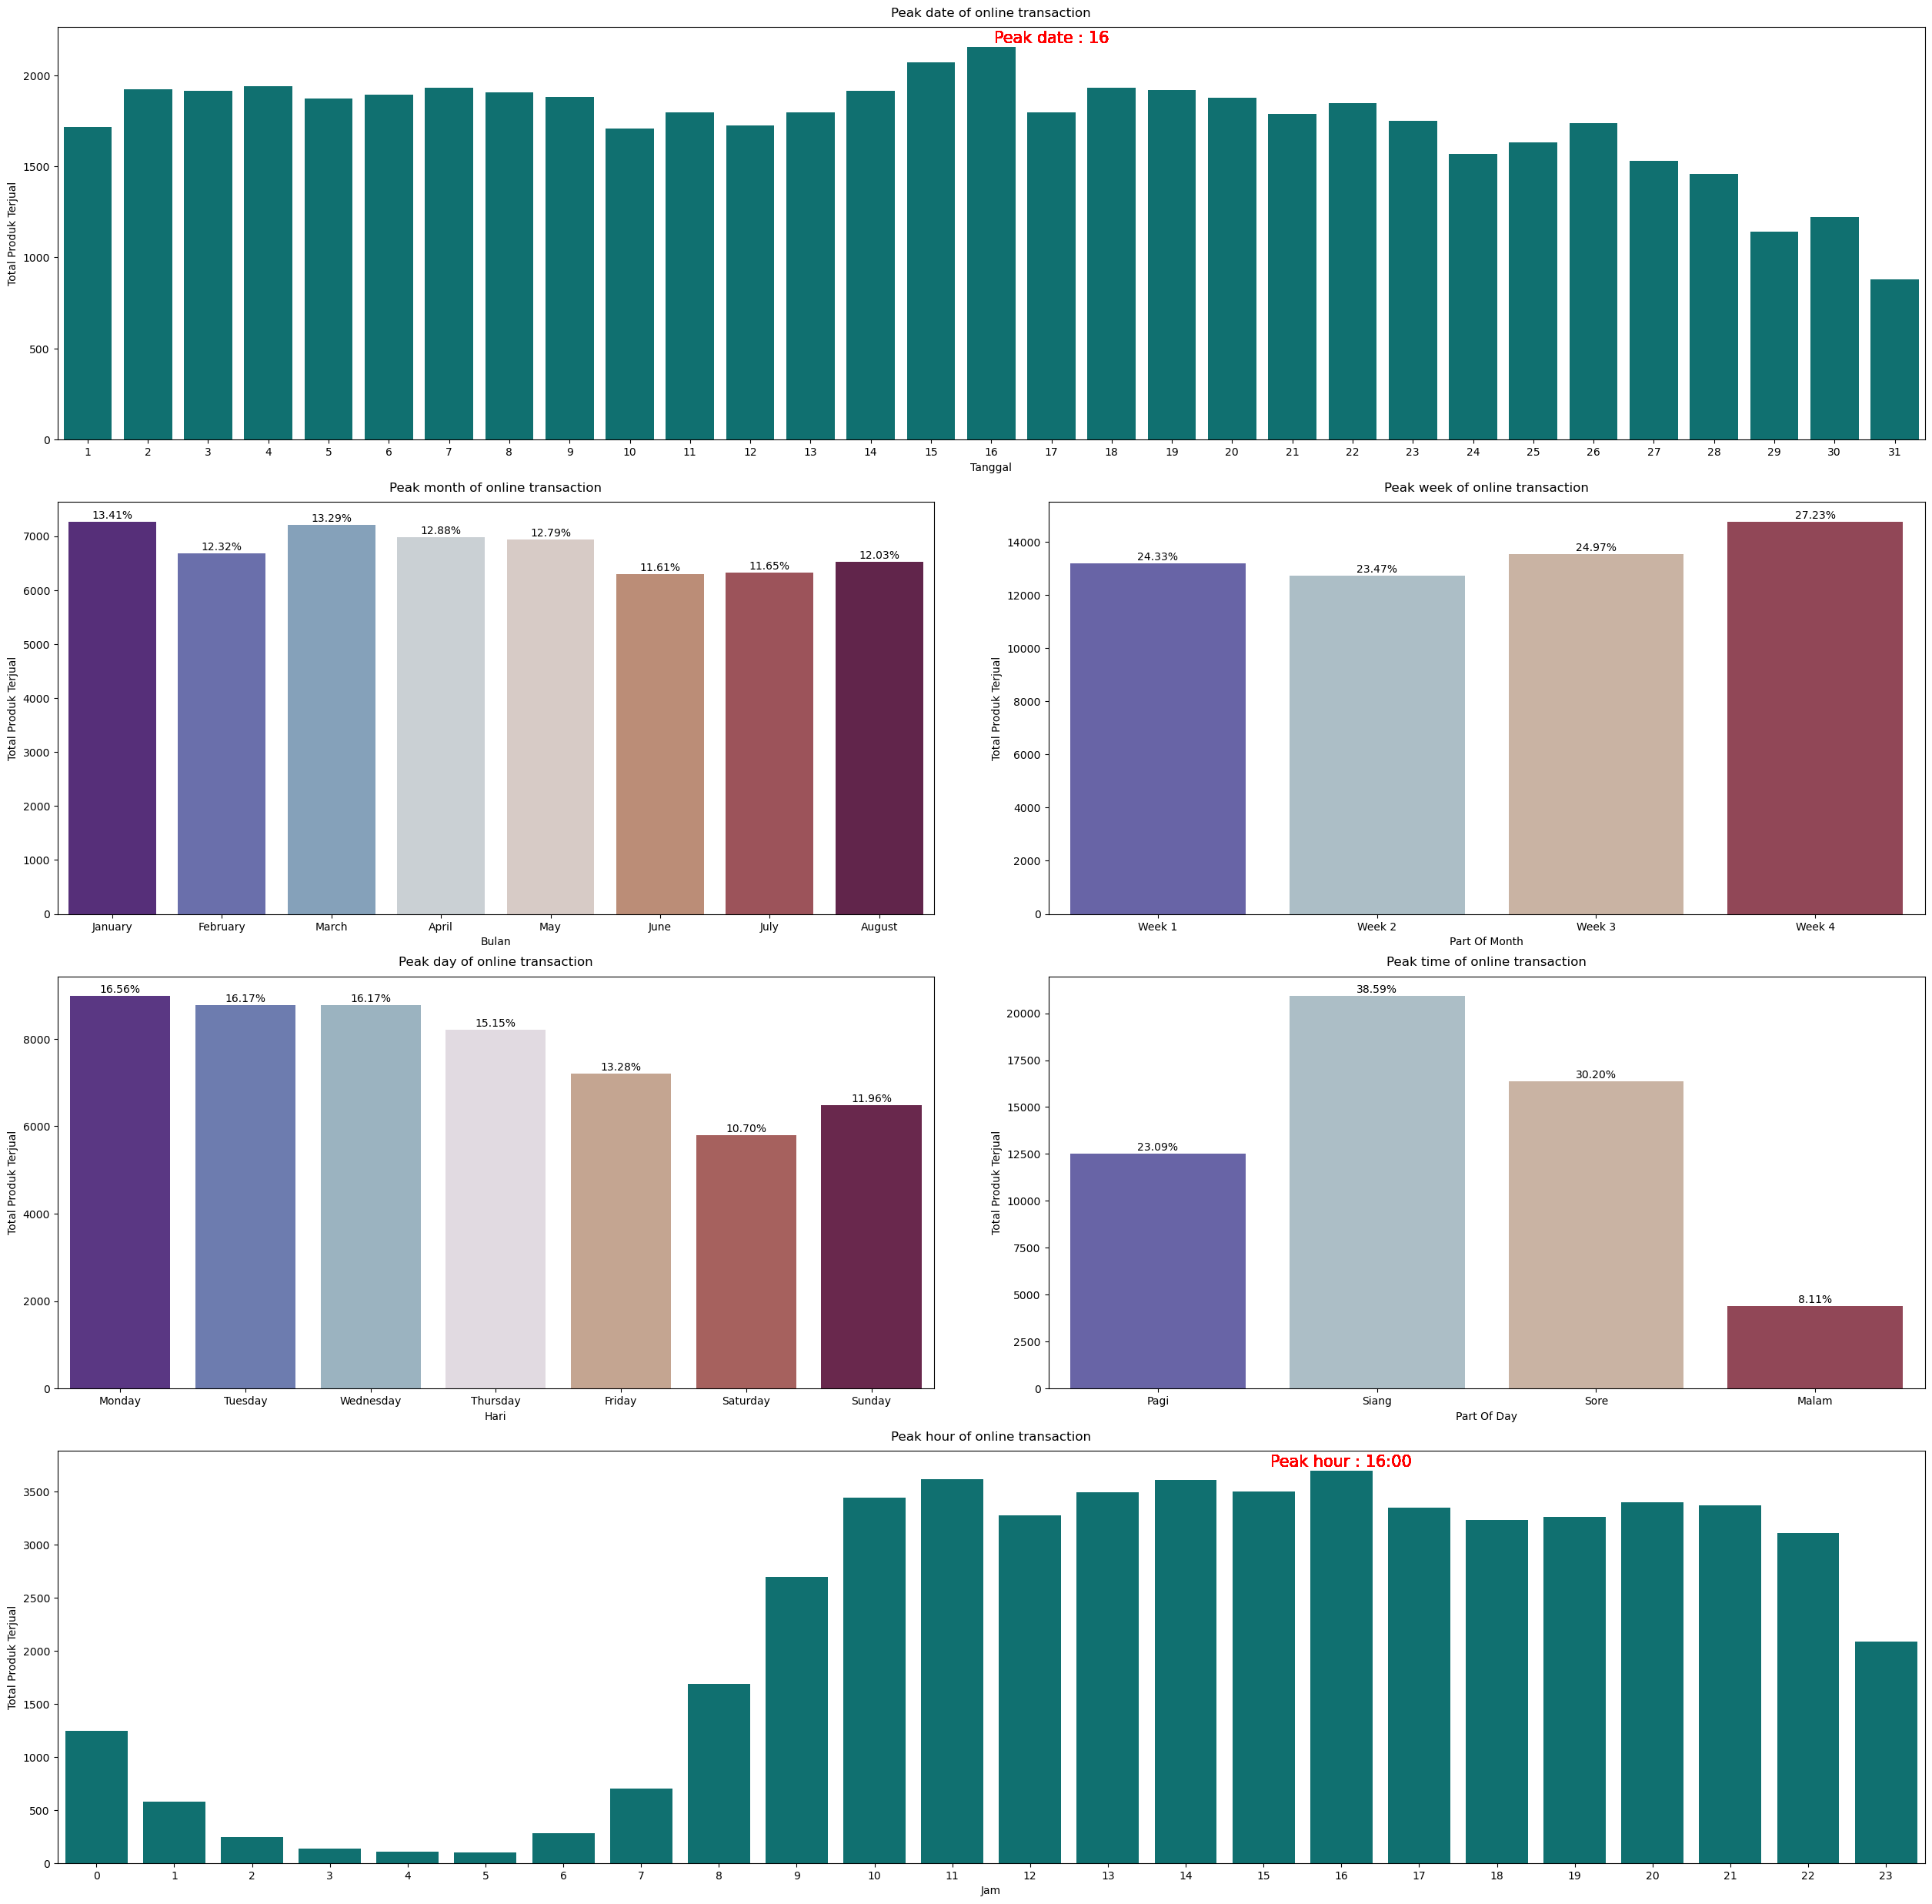

In [291]:
# Peak time online transaction happen in 2018
cond = df[(df['order_status'] == 'delivered') & (df['purchase_year'] == 2018)]
fig = plt.figure(constrained_layout=True, figsize=(25, 30))

# Axis definition
gs = GridSpec(5, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, :])

# Peak date 
sns.countplot(x=cond['purchase_day_number'],color='teal', ax= ax1)
for p in ax1.patches:
    ax1.annotate("Peak date : 16", xy = (16, 2155), xytext= (0, 8), 
    ha = 'center',  va='center', color='red', size=15, textcoords = 'offset points')
ax1.set_title('Peak date of online transaction', size=12, pad=10)
ax1.set_xlabel('Tanggal')
ax1.set_ylabel('Total Produk Terjual')

# Peak month
month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
sns.countplot(x=cond['purchase_month'], ax=ax2,palette='twilight_shifted', order=month_label)
total = len(cond['purchase_month'])
for p in ax2.patches:
    ax2.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
ax2.set_title('Peak month of online transaction', size=12, pad=10)
ax2.set_xlabel('Bulan')
ax2.set_ylabel('Total Produk Terjual')

# Peak week of month
week_label = ['Week 1', 'Week 2', 'Week 3', 'Week 4']
sns.countplot(x=cond['purchase_weekofmonth'],ax=ax3, palette='twilight_shifted', order=week_label)
total = len(cond['purchase_weekofmonth'])
for p in ax3.patches:
    ax3.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
ax3.set_title('Peak week of online transaction', size=12, pad=10)
ax3.set_xlabel('Part Of Month')
ax3.set_ylabel('Total Produk Terjual')

# Peak day
day_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x=cond['purchase_day'], ax=ax4,palette='twilight_shifted', order=day_label)
total = len(cond['purchase_day'])
for p in ax4.patches:
    ax4.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
ax4.set_title('Peak day of online transaction', size=12, pad=10)
ax4.set_xlabel('Hari')
ax4.set_ylabel('Total Produk Terjual')

# Peak time of day
time_label = ['Pagi', 'Siang', 'Sore', 'Malam']
sns.countplot(x=cond['purchase_timeofday'], ax=ax5,palette='twilight_shifted', order=time_label)
total = len(cond['purchase_timeofday'])
for p in ax5.patches:
    ax5.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
ax5.set_title('Peak time of online transaction', size=12, pad=10)
ax5.set_xlabel('Part Of Day')
ax5.set_ylabel('Total Produk Terjual')

# Peak hour
sns.countplot(x=cond['purchase_hour'],color='teal', ax= ax6)
for p in ax6.patches:
    ax6.annotate("Peak hour : 16:00", xy = (16, 3698), xytext= (0, 8),
                 ha = 'center',  va='center', color='red', size=15, textcoords = 'offset points')
ax6.set_title('Peak hour of online transaction', size=12, pad=10)
ax6.set_xlabel('Jam')
ax6.set_ylabel('Total Produk Terjual')

plt.savefig('peaktime_2018.png')

### 5.1 Peak time online transaction happen for the top 5 sold product of 2018

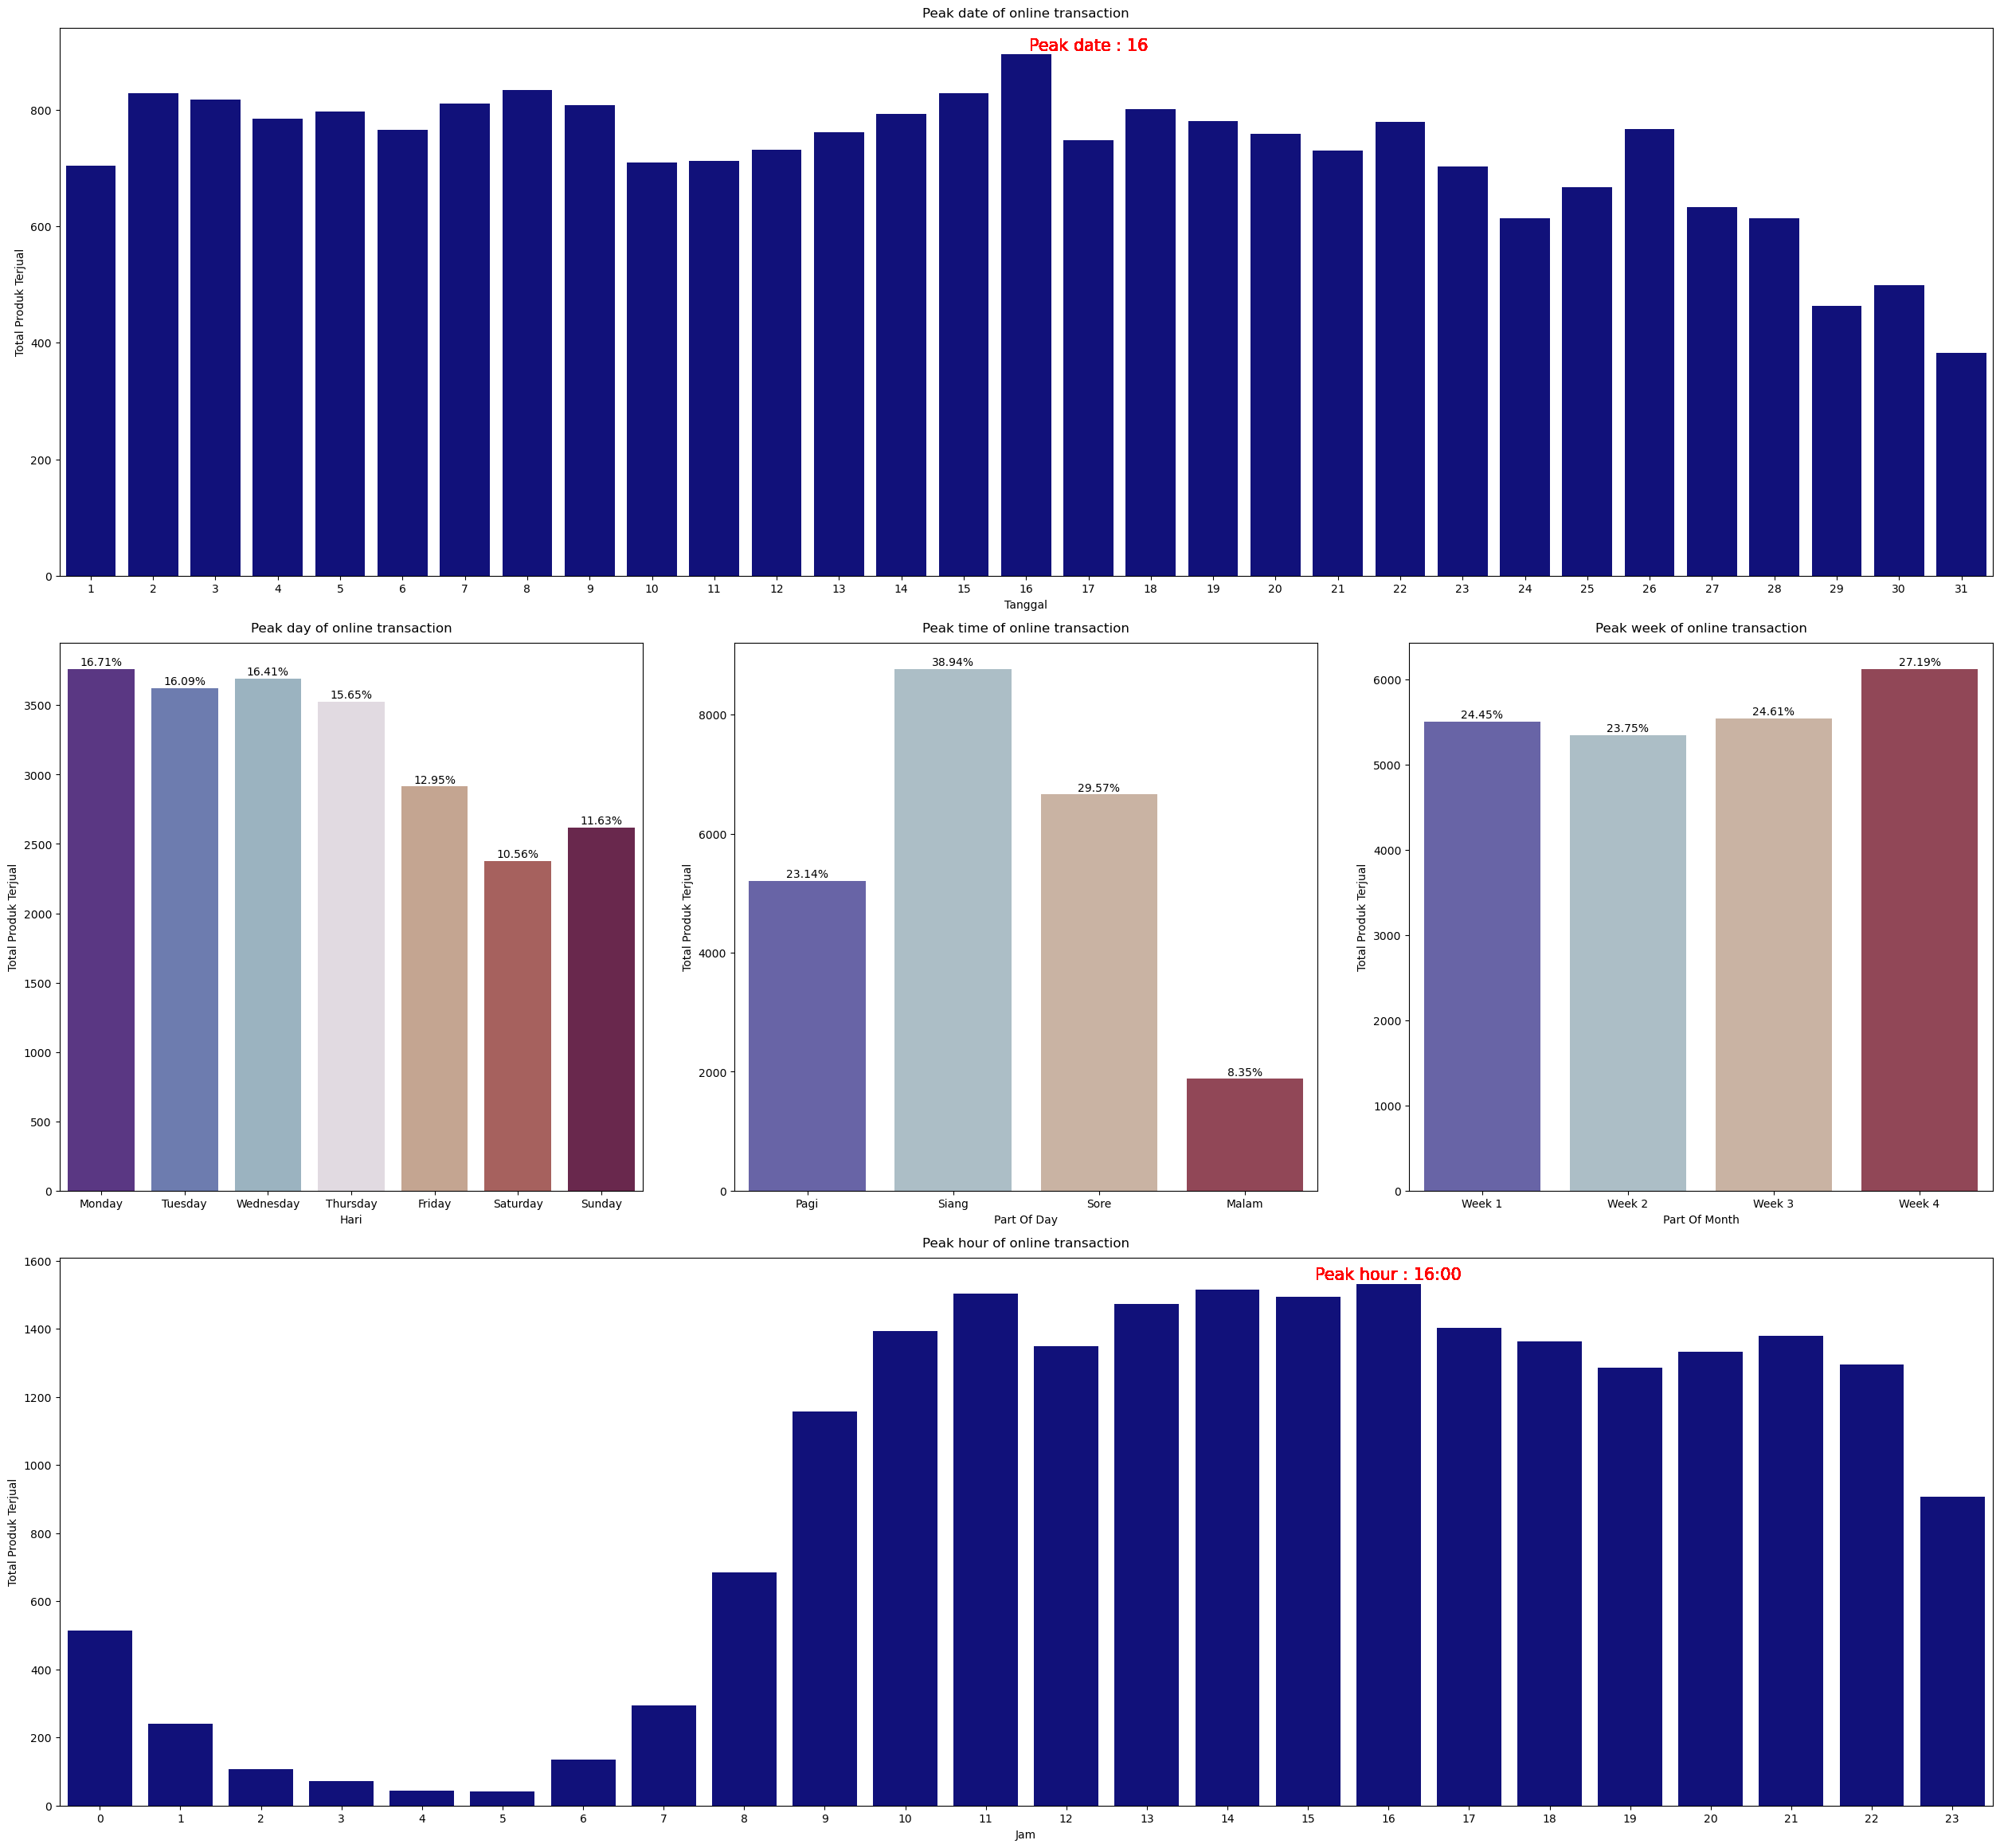

In [292]:
# Peak time online transaction of top 5 sold products happen in 2018
year_2018 = df[df['purchase_year'] == 2018]
cond = year_2018[(year_2018['order_status'] == 'delivered') & ((year_2018['product'] == 'bed_bath_table') | (year_2018['product'] == 'health_beauty') 
                                                  | (year_2018['product'] == 'sports_leisure') | (year_2018['product'] =='computers_accessories') 
                                                  | (year_2018['product'] =='watches_gifts'))]
fig = plt.figure(constrained_layout=True, figsize=(25, 30))

# Axis definition
gs = GridSpec(4, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[2, :])

# Peak date 
sns.countplot(x=cond['purchase_day_number'],color='darkblue', ax= ax1)
for p in ax1.patches:
    ax1.annotate("Peak date : 16", xy = (16, 895), xytext= (0, 8), 
    ha = 'center',  va='center', color='red', size=15, textcoords = 'offset points')
ax1.set_title('Peak date of online transaction', size=12, pad=10)
ax1.set_xlabel('Tanggal')
ax1.set_ylabel('Total Produk Terjual')

# Peak day
day_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x=cond['purchase_day'], ax=ax2,palette='twilight_shifted', order=day_label)
total = len(cond['purchase_day'])
for p in ax2.patches:
    ax2.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
ax2.set_title('Peak day of online transaction', size=12, pad=10)
ax2.set_xlabel('Hari')
ax2.set_ylabel('Total Produk Terjual')

# Peak time of day
time_label = ['Pagi', 'Siang', 'Sore', 'Malam']
sns.countplot(x=cond['purchase_timeofday'], ax=ax3,palette='twilight_shifted', order=time_label)
total = len(cond['purchase_timeofday'])
for p in ax3.patches:
    ax3.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
ax3.set_title('Peak time of online transaction', size=12, pad=10)
ax3.set_xlabel('Part Of Day')
ax3.set_ylabel('Total Produk Terjual')

# Peak week of month
week_label = ['Week 1', 'Week 2', 'Week 3', 'Week 4']
sns.countplot(x=cond['purchase_weekofmonth'],ax=ax4, palette='twilight_shifted', order=week_label)
total = len(cond['purchase_weekofmonth'])
for p in ax4.patches:
    ax4.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
ax4.set_title('Peak week of online transaction', size=12, pad=10)
ax4.set_xlabel('Part Of Month')
ax4.set_ylabel('Total Produk Terjual')

# Peak hour
sns.countplot(x=cond['purchase_hour'],color='darkblue', ax= ax5)
for p in ax5.patches:
    ax5.annotate("Peak hour : 16:00", xy = (16, 1532), xytext= (0, 8),
                 ha = 'center',  va='center', color='red', size=15, textcoords = 'offset points')
ax5.set_title('Peak hour of online transaction', size=12, pad=10)
ax5.set_xlabel('Jam')
ax5.set_ylabel('Total Produk Terjual')

plt.savefig('peaktime top 2018.png')

### 5.2 Peak time online transaction happen for the least 5 sold product of 2018

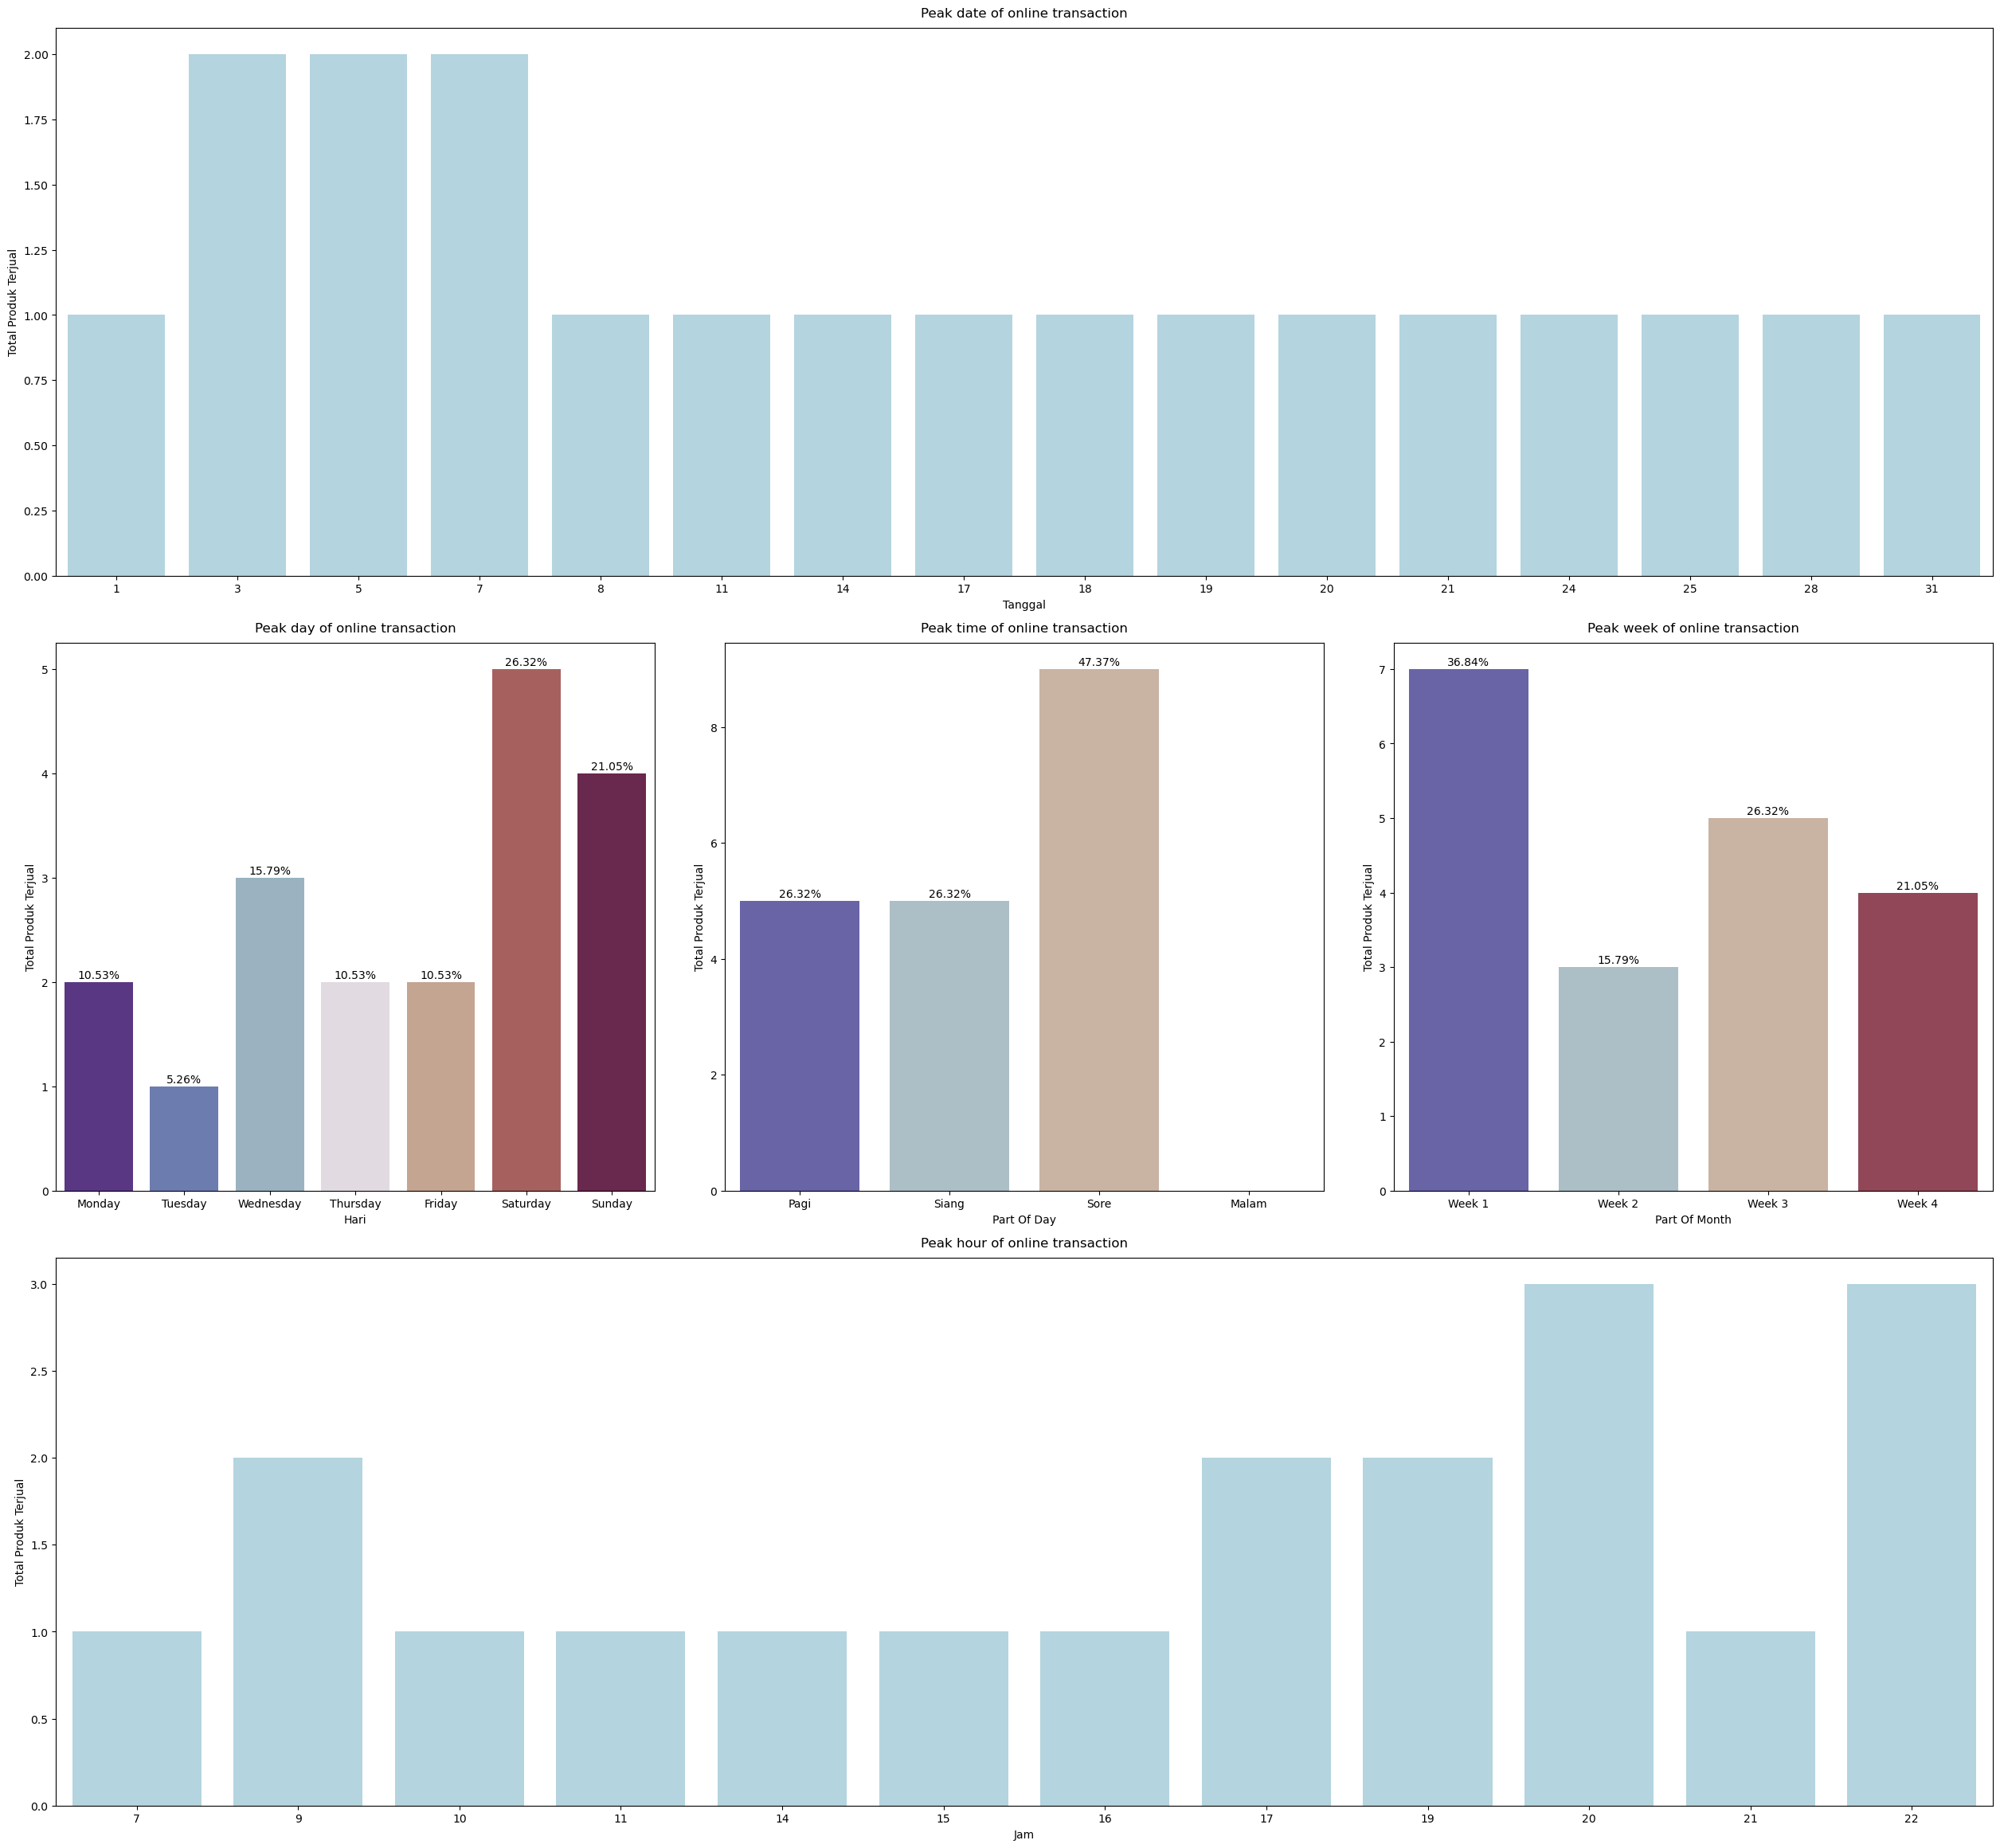

In [293]:
# Peak time online transaction of least 5 sold products happen in 2018
year_2018 = df[df['purchase_year'] == 2018]
cond = year_2018[(year_2018['order_status'] == 'delivered') & ((year_2018['product'] == 'home_comfort_2') | (year_2018['product'] == 'la_cuisine') 
                                                  | (year_2018['product'] == 'cds_dvds_musicals') | (year_2018['product'] =='fashion_childrens_clothes') 
                                                  | (year_2018['product'] =='fashion_sport'))]
fig = plt.figure(constrained_layout=True, figsize=(25, 30))

# Axis definition
gs = GridSpec(4, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[2, :])

# Peak date
sns.countplot(x=cond['purchase_day_number'],color='lightblue', ax= ax1)
ax1.set_title('Peak date of online transaction', size=12, pad=10)
ax1.set_xlabel('Tanggal')
ax1.set_ylabel('Total Produk Terjual')

# Peak day
day_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x=cond['purchase_day'], ax=ax2,palette='twilight_shifted', order=day_label)
total = len(cond['purchase_day'])
for p in ax2.patches:
    ax2.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
ax2.set_title('Peak day of online transaction', size=12, pad=10)
ax2.set_xlabel('Hari')
ax2.set_ylabel('Total Produk Terjual')

# Peak time of day
time_label = ['Pagi', 'Siang', 'Sore', 'Malam']
sns.countplot(x=cond['purchase_timeofday'], ax=ax3,palette='twilight_shifted', order=time_label)
total = len(cond['purchase_timeofday'])
for p in ax3.patches:
    ax3.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
ax3.set_title('Peak time of online transaction', size=12, pad=10)
ax3.set_xlabel('Part Of Day')
ax3.set_ylabel('Total Produk Terjual')

# Peak week of month
week_label = ['Week 1', 'Week 2', 'Week 3', 'Week 4']
sns.countplot(x=cond['purchase_weekofmonth'],ax=ax4, palette='twilight_shifted', order=week_label)
total = len(cond['purchase_weekofmonth'])
for p in ax4.patches:
    ax4.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
ax4.set_title('Peak week of online transaction', size=12, pad=10)
ax4.set_xlabel('Part Of Month')
ax4.set_ylabel('Total Produk Terjual')

# Peak hour
sns.countplot(x=cond['purchase_hour'],color='lightblue', ax= ax5)
ax5.set_title('Peak hour of online transaction', size=12, pad=10)
ax5.set_xlabel('Jam')
ax5.set_ylabel('Total Produk Terjual')

plt.savefig('peaktime least 2018.png')